In [36]:
from statsmodels.tsa.seasonal import seasonal_decompose
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [37]:
cleaned_df = pd.read_csv('Raw_df.csv')

In [38]:
# Texas Location: 22, New York Location: 3, Massachusetts Location:52

In [39]:
US_df = cleaned_df[["Series_Complete_Yes", "Date", "Location"]].copy()

In [40]:
filtered_df = pd.read_csv("Data/filtered_df.csv")

In [41]:
US_df_2 = filtered_df[["Series_Complete_Yes", "Date", "Location"]].copy()

In [42]:
US_df_2.head()

,Series_Complete_Yes,Date,Location
0,5286.0,12/14/2022 12:00:00 AM,49
1,3824.0,12/14/2022 12:00:00 AM,6
2,888.0,12/14/2022 12:00:00 AM,30
3,2060.0,12/14/2022 12:00:00 AM,5
4,62289.0,12/14/2022 12:00:00 AM,11


In [43]:
cleaned_df.head()

,Date,Location,Demographic_Category,census,Administered_Dose1,Series_Complete_Yes,Booster_Doses,Second_Booster,Administered_Dose1_pct_agegroup,Series_Complete_Pop_pct_agegroup,Booster_Doses_Vax_pct_agegroup,Second_Booster_Vax_pct_agegroup
0,12/14/2022 12:00:00 AM,SC,Ages_<5yrs,292464.0,12921.0,5286.0,NaN,NaN,4.4,1.8,NaN,NaN
1,12/14/2022 12:00:00 AM,OK,Ages_<5yrs,255533.0,8889.0,3824.0,NaN,NaN,3.5,1.5,NaN,NaN
2,12/14/2022 12:00:00 AM,DE,Male_Ages_<5yrs,27536.0,2169.0,888.0,NaN,NaN,7.9,3.2,NaN,NaN
3,12/14/2022 12:00:00 AM,HI,Male_Ages_<5yrs,43782.0,4093.0,2060.0,NaN,NaN,9.3,4.7,NaN,NaN
4,12/14/2022 12:00:00 AM,VT,Male_Ages_65+_yrs,57577.0,71382.0,62289.0,52504.0,35411.0,95.0,95.0,84.3,67.4


In [44]:
US_df.head()

,Series_Complete_Yes,Date,Location
0,5286.0,12/14/2022 12:00:00 AM,SC
1,3824.0,12/14/2022 12:00:00 AM,OK
2,888.0,12/14/2022 12:00:00 AM,DE
3,2060.0,12/14/2022 12:00:00 AM,HI
4,62289.0,12/14/2022 12:00:00 AM,VT


In [45]:
US_df_2["Date"] = pd.to_datetime(US_df_2["Date"])

In [46]:
US_df["Date"] = pd.to_datetime(US_df["Date"])

In [47]:
US_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1888560 entries, 0 to 1888559
Data columns (total 3 columns):
 #   Column               Dtype         
---  ------               -----         
 0   Series_Complete_Yes  float64       
 1   Date                 datetime64[ns]
 2   Location             object        
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 43.2+ MB


In [48]:
US_df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165120 entries, 0 to 165119
Data columns (total 3 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   Series_Complete_Yes  165120 non-null  float64       
 1   Date                 165120 non-null  datetime64[ns]
 2   Location             165120 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 3.8 MB


In [49]:
US_df_2.set_index("Date", inplace=True)

In [50]:
US_df.set_index("Date", inplace=True)

In [51]:
Massachusetts_df = US_df_2[US_df_2["Location"] == 52]
New_York_df = US_df_2[US_df_2["Location"] == 3]
Texas_df = US_df_2[US_df_2["Location"] == 22]

In [52]:
Massachusetts_df_mean = Massachusetts_df.groupby("Date").mean()
New_York_df_mean = New_York_df.groupby("Date").mean()
Texas_df_mean = Texas_df.groupby("Date").mean()

In [53]:
Texas_df_mean = Texas_df_mean.asfreq("d")
New_York_df_mean = New_York_df_mean.asfreq("d")
Massachusetts_df_mean = Massachusetts_df_mean.asfreq("d")

In [54]:
US_df_mean = US_df.groupby("Date").mean()

In [61]:
Texas_df_mean.fillna(method="bfill", inplace=True)
New_York_df_mean.fillna(method="bfill", inplace=True)
Massachusetts_df_mean.fillna(method="bfill", inplace=True)

In [57]:
Texas_df_mean.shape

(732, 2)

In [42]:
US_df_mean.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 732 entries, 2020-12-13 to 2022-12-14
Data columns (total 1 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Series_Complete_Yes  732 non-null    float64
dtypes: float64(1)
memory usage: 11.4 KB


In [43]:
US_df_mean.head()

,Series_Complete_Yes
Date,
2020-12-13,132.575139
2020-12-14,133.357798
2020-12-15,133.072566
2020-12-16,129.282927
2020-12-17,128.071111


### Below is showing the trend of the entire US with every state weighted equaly

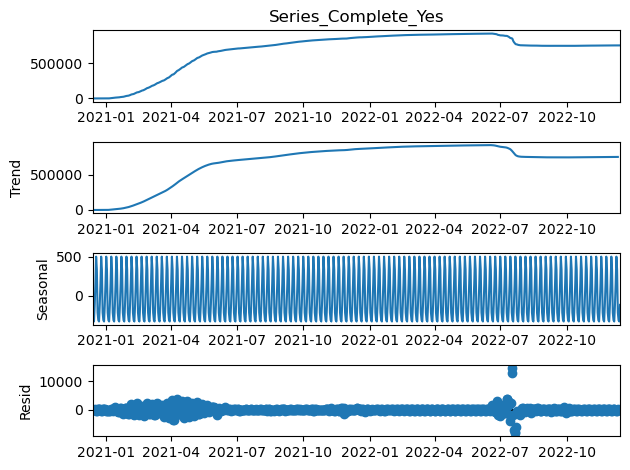

In [19]:
decomp = seasonal_decompose(US_df_mean["Series_Complete_Yes"])
decomp.plot();

In [24]:
Texas_df_mean

,Series_Complete_Yes,Location
Date,,
2020-12-13,0.000000e+00,22.0
2020-12-14,0.000000e+00,22.0
2020-12-15,7.906977e-01,22.0
2020-12-16,1.697674e+00,22.0
2020-12-17,3.116279e+00,22.0
...,...,...
2022-12-10,1.743938e+06,22.0
2022-12-11,1.743997e+06,22.0
2022-12-12,1.744125e+06,22.0


In [34]:
Texas_df_mean.dropna(inplace=True)

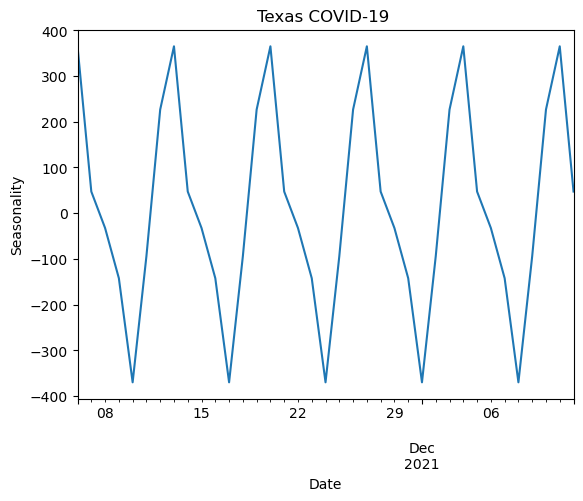

In [75]:
decomp = seasonal_decompose(Texas_df_mean["Series_Complete_Yes"][324:365])
plt.xlabel("Date")
plt.ylabel("Seasonality")
plt.title("Texas COVID-19 ")
decomp.seasonal.plot();

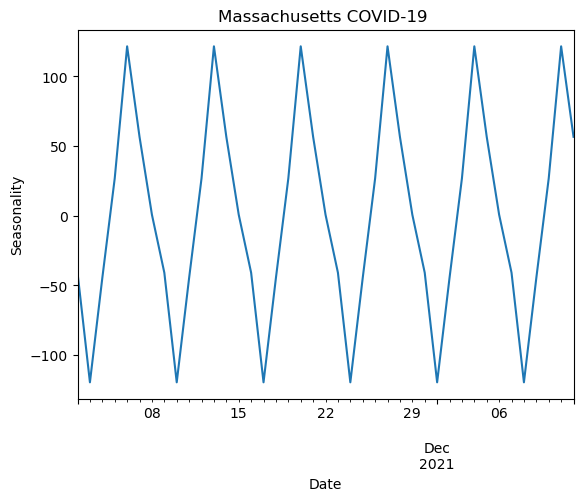

In [76]:
decomp = seasonal_decompose(Massachusetts_df_mean["Series_Complete_Yes"][324:365])
plt.xlabel("Date")
plt.ylabel("Seasonality")
plt.title("Massachusetts COVID-19 ")
decomp.seasonal.plot();

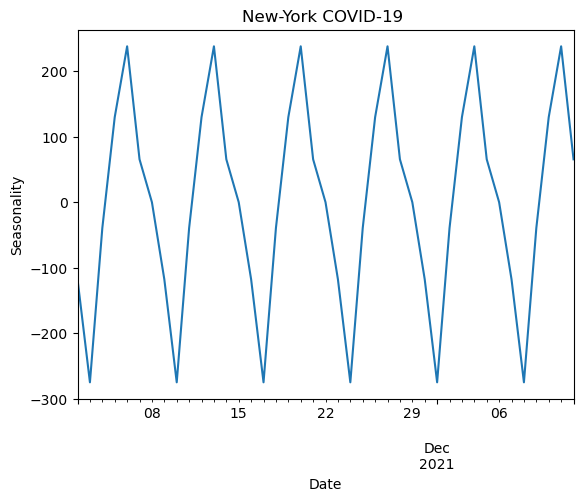

In [77]:
decomp = seasonal_decompose(New_York_df_mean["Series_Complete_Yes"][324:365])
plt.xlabel("Date")
plt.ylabel("Seasonality")
plt.title("New-York COVID-19 ")
decomp.seasonal.plot();

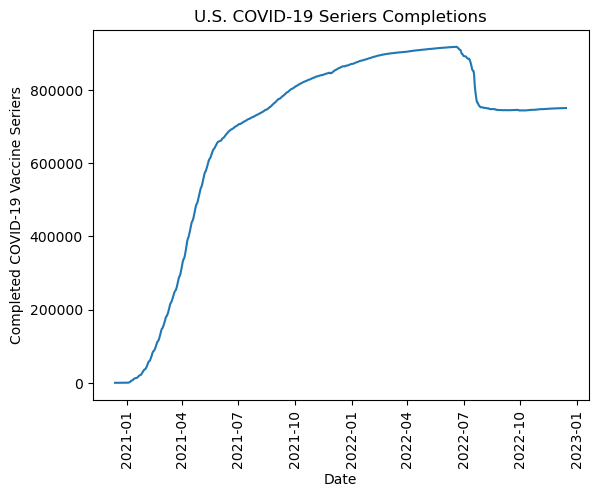

In [183]:
plt.xticks(rotation="vertical") 
plt.xlabel("Date")
plt.ylabel("Completed COVID-19 Vaccine Seriers")
plt.title("U.S. COVID-19 Seriers Completions")
plt.plot(US_df_mean["Series_Complete_Yes"]);

In [190]:
from statsmodels.graphics.tsaplots import plot_acf

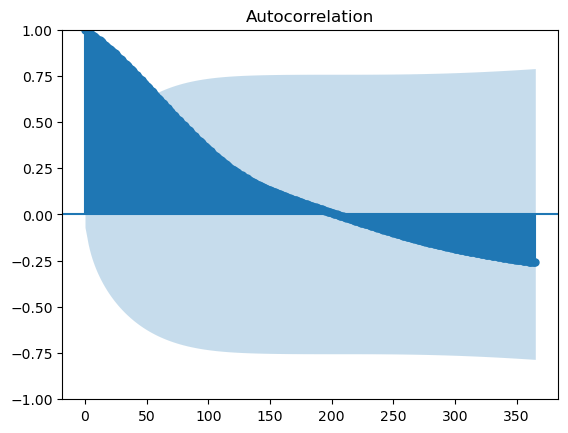

In [196]:
plot_acf(US_df_mean["Series_Complete_Yes"], lags=365);

In [199]:
# every data point is significantly affected to the last 2 months worth of data, the significance decreases over time